In [8]:
# import required modules
import pandas as pd

# read data into data frames
users_df = pd.read_csv("data/users.csv")
contents_df = pd.read_csv("data/contents.csv")
views_df = pd.read_csv("data/content_views.csv")

# view the top records from each data frame
print(users_df.head())
print(contents_df.head())
print(views_df.head())

   user id    country        role   department
0        1      India  Consultant      Finance
1        2  Singapore    Engineer  Engineering
2        3      India      Doctor     Medicine
3        4      China     Manager           HR
4        5  Singapore  Consultant      Finance
   content id     tags1  tags2  tags3
0           1  engaging  alpha  gamma
1           2    sports   beta  delta
2           3      news  theta   beta
3           4    sports  alpha  hello
   user id  content id           time-stamp
0        1           1  2018-01-02 11:30:00
1        1           2  2018-01-02 12:30:00
2        2           3  2018-02-02 11:30:00
3        2           1  2018-01-12 11:30:00
4        2           2  2018-01-14 11:30:21


## Process the data

In [16]:
# Generate a pivot table from the views data
content_views_per_user_df = pd.pivot_table(views_df, index = "user id", columns = "content id", values = "time-stamp", aggfunc="count")

# fill the NA values with 0 - since there are no views for these contents
content_views_per_user_df = content_views_per_user_df.fillna(value = 0)
content_views_per_user_df

content id,1,2,3,4
user id,,,,
1,1.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,2.0


## Visualize the pivot table by seeing the popularity of the contents (by number of total views)

In [32]:
# inline plots in the Jupyter notebook
%matplotlib inline

# import base visalization packages
import matplotlib.pyplot as plt
import numpy as np

# Get the sum along the rows
total_content_views = content_views_per_user_df.sum(axis = 0)
print(total_content_views)

content id
1    3.0
2    3.0
3    1.0
4    4.0
dtype: float64


In [33]:
# Get the top 5 content ids
top_5_contents = total_content_views.sort_values(ascending = False).head(5)
print(top_5_contents)

content id
4    4.0
2    3.0
1    3.0
3    1.0
dtype: float64


ValueError: incomplete format

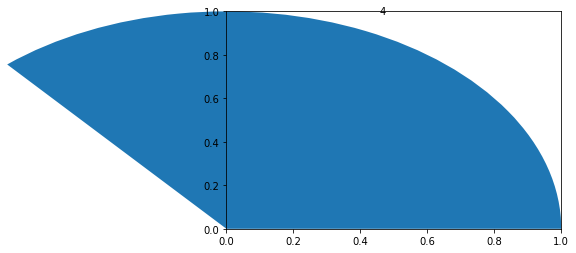

In [38]:
plt.pie(top_5_contents.values, labels = top_5_contents.index, autopct='%.2f')